In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
root_dir = '/content/drive/MyDrive/Datasets'

In [ ]:
os.listdir(root_dir)

['Cropped Images', 'BinRushed', 'ORIGA', 'G1020', 'REFUGE']

In [ ]:
bin_rushed = os.path.join(root_dir, 'BinRushed')

In [ ]:
paths = [os.path.join(bin_rushed, 'BinRushed1-Corrected'), os.path.join(bin_rushed, 'BinRushed2'), os.path.join(bin_rushed, 'BinRushed3'), os.path.join(bin_rushed, 'BinRushed4')]

In [ ]:
sample_image_path = os.path.join(paths[0], 'image24prime.jpg')

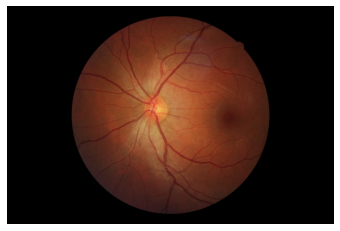

In [ ]:
sample_img = load_img(sample_image_path)
plt.axis(False)
plt.imshow(sample_img)
plt.show()

In [ ]:
output_dir = "/content/drive/MyDrive/Datasets/BinRushed/BinRushedPrepared"
if not os.path.exists(output_dir):
  os.mkdir(output_dir)

original_image_dir = os.path.join(output_dir, 'OriginalImages')
if not os.path.exists(original_image_dir):
  os.mkdir(original_image_dir)

In [ ]:
import importlib
from matplotlib.transforms import BboxTransformTo
def crop_image(img_path):
  im = cv2.imread(img_path)
  im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  imgray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
  ret, thresh = cv2.threshold(imgray, 34, 255, 0)
  # plt.imshow(thresh); plt.show()
  contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  largest_contour = None
  max_area = -1
  for cont in contours:
    new_area = cv2.contourArea(cont)
    if new_area > max_area:
      max_area = new_area
      largest_contour = cont  
  # cv2.drawContours(im, largest_contour, -1, (0,255,0), 3)
  x,y,w,h = cv2.boundingRect(largest_contour)
  # cv2.rectangle(im,(x,y),(x+w,y+h),(0,255,0),2)
  # plt.imshow(im)
  im = im[y:y+h, x:x+w]
  return im

In [ ]:
cropped = crop_image(sample_image_path)

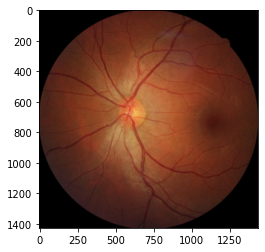

In [ ]:
plt.imshow(cropped)

In [ ]:
done = 0
print('Done with... ')
for i, path in enumerate(paths):
  for im in os.listdir(path):
    if 'prime' in im:
      done += 1
      cropped = crop_image(os.path.join(path, im))
      name = im[:im.find('prime')]+f'-{i+1}.jpg'
      tf.keras.utils.save_img(os.path.join(original_image_dir, name), cropped)
      print(done, end=' ')

Done with... 
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 